# Imports iniciais

In [1]:
import tensorflow as tf
import tensorflow_addons as tfa
import shutil
import os
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

IMAGE_SIZE = (240,640)

c:\modelTraining\.venv\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


# Verificação do balanceamento do dataset

In [ ]:
# Replace these paths with the paths to your dataset folders
dataset_folder_1 = "D:\\validation"
dataset_folder_2 = "D:\\training"
dataset_folder_3 = "D:\\testing"

# Create a list to store the class names
class_names = os.listdir(dataset_folder_1)

# Initialize a dictionary to store the class distribution
class_distribution = {class_name: 0 for class_name in class_names}

# Function to count the number of images in a folder
def count_images_in_folder(folder_path):
    num_images = len([f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')])  # Add more extensions if needed
    return num_images

# Loop through each class folder in the first dataset
for class_name in class_names:
    folder_path_1 = os.path.join(dataset_folder_1, class_name)
    folder_path_2 = os.path.join(dataset_folder_2, class_name)
    folder_path_3 = os.path.join(dataset_folder_3, class_name)
    
    # Count the number of images in each class folder across all datasets
    num_images_1 = count_images_in_folder(folder_path_1)
    num_images_2 = count_images_in_folder(folder_path_2)
    num_images_3 = count_images_in_folder(folder_path_3)
    
    # Calculate the total number of images for this class
    total_images = num_images_1 + num_images_2 + num_images_3
    
    # Update the class distribution dictionary
    class_distribution[class_name] = total_images

# Create a bar chart to visualize the class distribution
colors = ['blue', 'purple', 'green', 'orange', 'brown', 'red']
new_dict = {key: class_distribution[key] for key in class_distribution if key != 'mouse'}
new_dict['mouse'] = class_distribution['mouse']

newer_dict = {'click': new_dict['clique'], 'move': new_dict['mover'], 'rotate': new_dict['rodar'], 'zoom in': new_dict['zoomin'], 'zoom out': new_dict['zoomout'], 'mouse': new_dict['mouse']}

plt.figure(figsize=(8, 6))
plt.bar(newer_dict.keys(), newer_dict.values(), color=colors)
plt.xlabel('Class Label')
plt.ylabel('Number of samples')
#plt.title('Class Distribution of Image Dataset')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the bar chart
plt.show()

# Função para dar load ao dataset

In [2]:
def get_dataset(directory, shuffle, batch_size, color_mode):
    dataset = tf.keras.utils.image_dataset_from_directory(
    directory,
    seed=123,
    color_mode=color_mode,
    image_size=IMAGE_SIZE,
    label_mode='categorical',
    batch_size=batch_size,
    shuffle=shuffle)

    return dataset

# Funções de delete e copy de folders e o seu conteúdo

In [3]:
def delete_folder(folder_path):
    shutil.rmtree(folder_path)
    print("Folder deleted successfully!")

def copy_items(source_folder, destination_folder, regex_pattern):
    # Check if the source folder exists
    if not os.path.exists(source_folder):
        print("{} folder does not exist.".format(source_folder))
        return
    # Create the destination folder if it doesn't exist
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Get a list of all items in the source folder
    items = os.listdir(source_folder)
    print(len(items))

    # Iterate over each item
    for i in range(len(items)):
        #  Get the file at index i
        item = items[i]
        # Check if the item matches the regular expression pattern
        if re.match(regex_pattern, item):
            # Get the full path of the item
            item_path = os.path.join(source_folder, item)
            if (i % 3 == 0):
                # Move the item to the destination folder
                shutil.copy2(item_path, destination_folder)
                
    print("{} was copied.".format(source_folder))

    # Set the source folder, destination folder, and regular expression pattern
    source_folder = "D:\\BackupProtocoloRecolha\\01"

def create_dataset(type_of_save, ids_to_copy):
    clique_folder = f"D:\\{type_of_save}\\clique"
    mouse_folder = f"D:\\{type_of_save}\\mouse"
    mover_folder = f"D:\\{type_of_save}\\mover"
    rodar_folder = f"D:\\{type_of_save}\\rodar"
    zoomin_folder = f"D:\\{type_of_save}\\zoomin"
    zoomout_folder = f"D:\\{type_of_save}\\zoomout"

    for x in ids_to_copy:
        if x < 10:
            source_folder = "D:\\BackupProtocoloRecolha\\0{}".format(x)
        else:
            source_folder = "D:\\BackupProtocoloRecolha\\{}".format(x)

        for i in range(13):
            regex_pattern = r"^({})-.*\.png".format(i)
            if i == 0:
                destination_folder = clique_folder
            elif i == 1:
                destination_folder = mover_folder
            elif i == 2:
                destination_folder = rodar_folder
            elif i == 3:
                destination_folder = zoomin_folder
            elif i == 4:
                destination_folder = zoomout_folder
            elif i == 5:
                destination_folder = mouse_folder
            elif i == 7:
                destination_folder = clique_folder
            elif i == 8:
                destination_folder = mover_folder
            elif i == 9:
                destination_folder = rodar_folder
            elif i == 10:
                destination_folder = zoomin_folder
            elif i == 11:
                destination_folder = zoomout_folder
            elif i == 12:
                destination_folder = mouse_folder
                # Call the move_items function with the provided parameters
            if i != 6:
                copy_items(source_folder, destination_folder, regex_pattern)

# Criação do dataset de testes

In [4]:
test_index = [10, 8, 11, 16]

create_dataset("testing-aug-completo", [10,8,11,16])

15828
D:\BackupProtocoloRecolha\10 was copied.
15828
D:\BackupProtocoloRecolha\10 was copied.
15828
D:\BackupProtocoloRecolha\10 was copied.
15828
D:\BackupProtocoloRecolha\10 was copied.
15828
D:\BackupProtocoloRecolha\10 was copied.
15828
D:\BackupProtocoloRecolha\10 was copied.
15828
D:\BackupProtocoloRecolha\10 was copied.
15828
D:\BackupProtocoloRecolha\10 was copied.
15828
D:\BackupProtocoloRecolha\10 was copied.
15828
D:\BackupProtocoloRecolha\10 was copied.
15828
D:\BackupProtocoloRecolha\10 was copied.
15828
D:\BackupProtocoloRecolha\10 was copied.
16305
D:\BackupProtocoloRecolha\08 was copied.
16305
D:\BackupProtocoloRecolha\08 was copied.
16305
D:\BackupProtocoloRecolha\08 was copied.
16305
D:\BackupProtocoloRecolha\08 was copied.
16305
D:\BackupProtocoloRecolha\08 was copied.
16305
D:\BackupProtocoloRecolha\08 was copied.
16305
D:\BackupProtocoloRecolha\08 was copied.
16305
D:\BackupProtocoloRecolha\08 was copied.
16305
D:\BackupProtocoloRecolha\08 was copied.
16305
D:\Back

# Funções de data augmentation

In [ ]:
random_rotation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomRotation(0.2),
    ]
)

random_translation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomTranslation(0.2, 0.4)
    ]
)

random_combination = tf.keras.Sequential(
    [
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomTranslation(0.2, 0.4),
        tf.keras.layers.RandomZoom(0.3)
    ]
)

# Folds de validação

In [4]:
val_folds = [
    [5, 13, 18],
    [3, 21, 20],
    [14, 12, 13],
    [4, 22, 7],
    [24, 9, 5],
    [23, 19, 15],
    [4, 12, 22],
    [6, 13, 24],
    [9, 18, 20]
    ]


# CNN 1

In [3]:
def cnn_model(img_height, img_width, channels):

    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)))
    model.add(tf.keras.layers.Conv2D(filters=14, kernel_size=(5, 5), activation='relu'))
    model.add(tf.keras.layers.AveragePooling2D())
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Conv2D(filters=14, kernel_size=(5, 5), activation='relu'))
    model.add(tf.keras.layers.AveragePooling2D())
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Conv2D(filters=14, kernel_size=(5, 5), activation='relu'))
    model.add(tf.keras.layers.AveragePooling2D())
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Conv2D(filters=14, kernel_size=(5, 5), activation='relu'))
    model.add(tf.keras.layers.AveragePooling2D())
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(6, activation='softmax'))


    opt = tf.keras.optimizers.Adam(lr=0.0001)
    model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=[ 'accuracy'])
    return model

def prepare_callbacks(directory):
    checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=directory,
                               monitor = 'val_accuracy',
                               verbose=1,
                               save_weights_only=True,
                               save_best_only=True)


    earlyStopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta = 0.0001, patience = 15, verbose = 1)

    reduceLR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.000000001, verbose = 1)

    return [checkpointer, earlyStopper, reduceLR]

## Loop de treino

In [9]:
all_voluntairs = [3, 6, 4, 5, 7, 9, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24]
history_array_cnn1 = []
result_array_cnn1 = []
current_fold = 0

# Get the test dataset
test_dataset = get_dataset("D:\\testing-aug", False, 32, "grayscale")

for fold in val_folds:
    # Crio o dataset de validação
    create_dataset("validation-aug", fold)
    val_dataset = get_dataset("D:\\validation-aug", False, batch_size=32, color_mode="grayscale")
    
    # Determino os indices de treino
    train_index = [x for x in all_voluntairs if x not in fold]

    # Crio o dataset de treino
    create_dataset("training-aug", train_index)
    train_dataset = get_dataset("D:\\training-aug", True, batch_size=32, color_mode="grayscale")
    
    # Instancio um modelo novo
    model = cnn_model(img_height=240, img_width=640, channels=1)

    # Preparo os callback do novo modelo
    callbacks = prepare_callbacks(f"cnn1.1-aug/{current_fold}/test.ckpt")

    processed_data = train_dataset
    processed_data = processed_data.concatenate(train_dataset.map(lambda x, y: (random_rotation(x), y)))
    processed_data = processed_data.concatenate(train_dataset.map(lambda x, y: (random_translation(x), y)))

    # Treino o modelo e guardo a historia num array
    history = model.fit(processed_data, validation_data=val_dataset, epochs=20, callbacks=callbacks)
    history_array_cnn1.append(history)

    result = model.evaluate(test_dataset)
    result_array_cnn1.append(result)
    
    # Elimino as pastas criadas
    delete_folder("D:\\validation-aug")
    delete_folder("D:\\training-aug")

    current_fold += 1

Found 21523 files belonging to 6 classes.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16371
D:\BackupProtocoloRecolha\13 was copied.
16371
D:\BackupProtocoloRecolha\13 was copied.
16371
D:\BackupProtocoloRecolha\13 was copied.
16371
D:\BackupProtocoloRecolha\13 was copied.
16371
D:\BackupProtocoloRecolha\13 was copied.
16371
D:\BackupProtocoloRecolha\13 was copied.
16371
D:\BackupProtocoloRecolha\13 was copied.
16371
D:\BackupProtocoloRecolha\13 was copied.
16371
D:\BackupPro

c:\modelTraining\.venv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
8600/8601 [============================>.] - ETA: 0s - loss: 0.6555 - accuracy: 0.7514
Epoch 1: val_accuracy improved from -inf to 0.88990, saving model to cnn1.1-aug/0\test.ckpt
8601/8601 [==============================] - 2357s 272ms/step - loss: 0.6554 - accuracy: 0.7514 - val_loss: 0.6985 - val_accuracy: 0.8899 - lr: 1.0000e-04
Epoch 2/20
8601/8601 [==============================] - ETA: 0s - loss: 0.1412 - accuracy: 0.9522
Epoch 2: val_accuracy improved from 0.88990 to 0.90429, saving model to cnn1.1-aug/0\test.ckpt
8601/8601 [==============================] - 2201s 256ms/step - loss: 0.1412 - accuracy: 0.9522 - val_loss: 0.7776 - val_accuracy: 0.9043 - lr: 1.0000e-04
Epoch 3/20
8601/8601 [==============================] - ETA: 0s - loss: 0.0763 - accuracy: 0.9744
Epoch 3: val_accuracy improved from 0.90429 to 0.92040, saving model to cnn1.1-aug/0\test.ckpt
8601/8601 [==============================] - 2204s 256ms/step - loss: 0.0763 - accuracy: 0.9744 - val_loss: 0.7949

## Matriz de confusão para um modelo em específico

Found 21523 files belonging to 6 classes.


c:\modelTraining\.venv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


673/673 [==============================] - 94s 93ms/step


Text(50.722222222222214, 0.5, 'True labels')

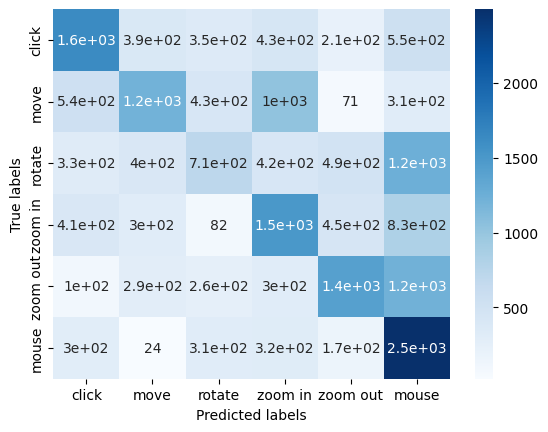

In [4]:
test_dataset = get_dataset("D:/testing-aug", False, 32, "grayscale")

model = cnn_model(240,640,1)

model.load_weights(f"C:\\modelTraining\\imageBased\\cnn1.1-aug\\0\\test.ckpt")

predictions = model.predict(test_dataset)

true_labels = []
for _, labels in test_dataset:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())

true_labels = np.array(true_labels)
predicted_labels = np.argmax(predictions, axis=1)


cm = tf.math.confusion_matrix(true_labels, predicted_labels)

sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['click', 'move', 'rotate', 'zoom in', 'zoom out', 'mouse'], yticklabels= ['click', 'move', 'rotate', 'zoom in', 'zoom out', 'mouse'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

## Resultados dos dados de treino para os 9 modelos

In [10]:
result_array_cnn1

[[8.926522254943848, 0.41049110889434814],
 [9.489291191101074, 0.40747109055519104],
 [8.865389823913574, 0.42693862318992615],
 [7.69950008392334, 0.4246155321598053],
 [12.303181648254395, 0.3555266559123993],
 [11.189228057861328, 0.3878641426563263],
 [8.407997131347656, 0.40696001052856445],
 [9.443303108215332, 0.3826139569282532],
 [11.049959182739258, 0.3964131474494934]]

## Resultado dos dados de treino para um modelo em específico

In [12]:
model.load_weights("cnn1.1-aug/0/test.ckpt")
model.evaluate(test_dataset)

673/673 [==============================] - 35s 51ms/step - loss: 8.4208 - accuracy: 0.4166


[8.420770645141602, 0.4166240692138672]

## Save do modelo

In [6]:
model = cnn_model(240,640,1)

model.load_weights(f"C:\\modelTraining\\imageBased\\cnn1.1-aug\\0\\test.ckpt")
model.save("protobuf-models/cnn1-img-aug-fold0")

c:\modelTraining\.venv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


INFO:tensorflow:Assets written to: protobuf-models/cnn1-img-aug-fold0\assets


INFO:tensorflow:Assets written to: protobuf-models/cnn1-img-aug-fold0\assets


# VGG16 Augmented

Importante notar aqui que não foi usado Rescaling e devia. Para fazer isto como deve de ser basta descomentar a linha Rescaling na célula do loop de treino

In [6]:
def vgg16_2():
    # Chamar o VGG16 com o trainable a Falso
    vgg_model = tf.keras.applications.vgg16.VGG16(include_top=False, weights="imagenet")
    vgg_model.trainable=False

    # Mudar a camada de input
    inputs = tf.keras.Input(shape=(224,224,3))
    x = vgg_model(inputs, training=False)

    # Criar as duas camadas para previsão
    fc1 = tf.keras.layers.Dense(250)(x)
    fc2 = tf.keras.layers.Dense(200)(fc1)
    fc3 = tf.keras.layers.Dense(100)(fc2)
    fc4 = tf.keras.layers.Dense(50)(fc3)
    x = tf.keras.layers.Flatten()(fc4)
    output = tf.keras.layers.Dense(6, activation='softmax')(x)

    # Compilação do modelo
    model = tf.keras.Model(inputs, output)
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss = "categorical_crossentropy",
                  metrics = ["accuracy"])
    
    return model

def prepare_callbacks(directory):
    checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=directory,
                               monitor = 'val_accuracy',
                               verbose=1,
                               save_weights_only=True,
                               save_best_only=True)


    earlyStopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta = 0.0001, patience = 15, verbose = 1)

    reduceLR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.000000001, verbose = 1)

    return [checkpointer, earlyStopper, reduceLR]

## Loop de treino

In [10]:
all_voluntairs = [3, 6, 4, 5, 7, 9, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24]
history_array_vgg_2 = []
result_array_vgg_2 = []
current_fold = 0
AUTOTUNE = tf.data.AUTOTUNE

layers = tf.keras.Sequential([
    tf.keras.layers.Resizing(224,224, crop_to_aspect_ratio=True),
    #tf.keras.layers.Rescaling(1./255)
])

# Get the test dataset
test_dataset = get_dataset("D:/testing-aug", False, 32, "rgb")
test_dataset = test_dataset.map(lambda x,y: (layers(x), y))

for fold in val_folds:
    # Crio o dataset de validação
    create_dataset("validation-aug", fold)
    val_dataset = get_dataset("D:/validation-aug", False, batch_size=32, color_mode="rgb")
    
    # Determino os indices de treino
    train_index = [x for x in all_voluntairs if x not in fold]

    # Crio o dataset de treino
    create_dataset("training-aug", train_index)
    train_dataset = get_dataset("D:/training-aug", True, batch_size=32, color_mode="rgb")
    
    # Resize das imagens porque o vgg não aceita tão grandes
    train_dataset = train_dataset.map(lambda x,y: (layers(x),y))
    val_dataset = val_dataset.map(lambda x,y: (layers(x),y))

    # Aplica as funções de image augmentation
    processed_data = train_dataset
    processed_data = processed_data.concatenate(train_dataset.map(lambda x, y: (random_rotation(x), y)))
    processed_data = processed_data.concatenate(train_dataset.map(lambda x, y: (random_translation(x), y)))

    # Instancio um modelo novo
    model = vgg16_2()

    # Preparo os callback do novo modelo
    callbacks = prepare_callbacks(f"vgg16-sem-scale-img-aug/{current_fold}/test.ckpt")

    # Treino o modelo e guardo a historia num array
    history = model.fit(processed_data, validation_data=val_dataset, epochs=20, callbacks=callbacks)
    history_array_vgg_2.append(history)

    result = model.evaluate(test_dataset)
    result_array_vgg_2.append(result)
    
    # Elimino as pastas criadas
    delete_folder("D:/validation-aug")
    delete_folder("D:/training-aug")

    current_fold += 1

Found 21523 files belonging to 6 classes.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16371
D:\BackupProtocoloRecolha\13 was copied.
16371
D:\BackupProtocoloRecolha\13 was copied.
16371
D:\BackupProtocoloRecolha\13 was copied.
16371
D:\BackupProtocoloRecolha\13 was copied.
16371
D:\BackupProtocoloRecolha\13 was copied.
16371
D:\BackupProtocoloRecolha\13 was copied.
16371
D:\BackupProtocoloRecolha\13 was copied.
16371
D:\BackupProtocoloRecolha\13 was copied.
16371
D:\BackupPro

## Resultados dos dados de teste e matriz de confusão para um dado modelo

Found 21523 files belonging to 6 classes.
673/673 [==============================] - 282s 418ms/step


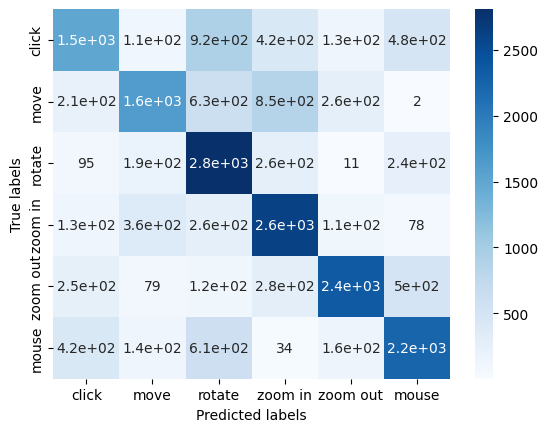

In [8]:
layer = tf.keras.layers.Resizing(224,224, crop_to_aspect_ratio=True)

test_dataset = get_dataset("D:/testing-aug", False, 32, "rgb")
test_dataset = test_dataset.map(lambda x,y: (layer(x), y))

model = vgg16_2()

model.load_weights(f"C:\\modelTraining\\imageBased\\vgg16-sem-scale-img-aug\\4\\test.ckpt")

test_images = test_dataset.map(lambda x,y: x)
test_labels = test_dataset.map(lambda x,y: y)
model.evaluate(test_dataset)
predictions = model.predict(test_dataset)

true_labels = []
for _, labels in test_dataset:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())

true_labels = np.array(true_labels)
predicted_labels = np.argmax(predictions, axis=1)


cm = tf.math.confusion_matrix(true_labels, predicted_labels)

sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['click', 'move', 'rotate', 'zoom in', 'zoom out', 'mouse'], yticklabels= ['click', 'move', 'rotate', 'zoom in', 'zoom out', 'mouse'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

## Save do modelo

In [3]:
model = vgg16_2()

model.load_weights(f"C:\\modelTraining\\imageBased\\vgg16-sem-scale-img-aug\\4\\test.ckpt")
model.save("protobuf-models/vgg16-sem-scale-img-aug-fold4")

INFO:tensorflow:Assets written to: protobuf-models/vgg16-sem-scale-img-aug-fold4\assets


INFO:tensorflow:Assets written to: protobuf-models/vgg16-sem-scale-img-aug-fold4\assets


# VGG16 Augmented with changed architecture (Two dense with 2048 nodes)

In [9]:
def vgg16_3():
    # Chamar o VGG16 com o trainable a Falso
    vgg_model = tf.keras.applications.vgg16.VGG16(include_top=False, weights="imagenet")
    vgg_model.trainable=False

    # Mudar a camada de input
    inputs = tf.keras.Input(shape=(224,224,3))
    x = vgg_model(inputs, training=False)

    # Criar as duas camadas para previsão
    fc1 = tf.keras.layers.Dense(2048)(x)
    fc2 = tf.keras.layers.Dense(2048)(fc1)
    x = tf.keras.layers.Flatten()(fc2)
    output = tf.keras.layers.Dense(6, activation='softmax')(x)

    # Compilação do modelo
    model = tf.keras.Model(inputs, output)
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss = "categorical_crossentropy",
                  metrics = ["accuracy"])
    
    return model

def prepare_callbacks(directory):
    checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=directory,
                               monitor = 'val_accuracy',
                               verbose=1,
                               save_weights_only=True,
                               save_best_only=True)


    earlyStopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta = 0.0001, patience = 15, verbose = 1)

    reduceLR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.000000001, verbose = 1)

    return [checkpointer, earlyStopper, reduceLR]

## Loop de treino

In [8]:
all_voluntairs = [3, 6, 4, 5, 7, 9, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24]
history_array_vgg_3 = []
result_array_vgg_3 = []
current_fold = 0
AUTOTUNE = tf.data.AUTOTUNE

layers = tf.keras.Sequential([
    tf.keras.layers.Resizing(224,224, crop_to_aspect_ratio=True),
    tf.keras.layers.Rescaling(1./255)
])

# Get the test dataset
test_dataset = get_dataset("D:/testing-aug", False, 32, "rgb")
test_dataset = test_dataset.map(lambda x,y: (layers(x), y))

for fold in val_folds:
    # Crio o dataset de validação
    create_dataset("validation-aug", fold)
    val_dataset = get_dataset("D:/validation-aug", False, batch_size=32, color_mode="rgb")
    
    # Determino os indices de treino
    train_index = [x for x in all_voluntairs if x not in fold]

    # Crio o dataset de treino
    create_dataset("training-aug", train_index)
    train_dataset = get_dataset("D:/training-aug", True, batch_size=32, color_mode="rgb")
    
    # Resize das imagens porque o vgg não aceita tão grandes
    train_dataset = train_dataset.map(lambda x,y: (layers(x),y))
    val_dataset = val_dataset.map(lambda x,y: (layers(x),y))

    # Aplica as funções de image augmentation
    processed_data = train_dataset
    processed_data = processed_data.concatenate(train_dataset.map(lambda x, y: (random_rotation(x), y)))
    processed_data = processed_data.concatenate(train_dataset.map(lambda x, y: (random_translation(x), y)))

    # Instancio um modelo novo
    model = vgg16_3()

    # Preparo os callback do novo modelo
    callbacks = prepare_callbacks(f"vgg16-mais-nodes-img-aug/{current_fold}/test.ckpt")

    # Treino o modelo e guardo a historia num array
    history = model.fit(processed_data, validation_data=val_dataset, epochs=20, callbacks=callbacks)
    history_array_vgg_3.append(history)

    result = model.evaluate(test_dataset)
    result_array_vgg_3.append(result)
    
    # Elimino as pastas criadas
    delete_folder("D:/validation-aug")
    delete_folder("D:/training-aug")

    current_fold += 1

Found 21523 files belonging to 6 classes.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16371
D:\BackupProtocoloRecolha\13 was copied.
16371
D:\BackupProtocoloRecolha\13 was copied.
16371
D:\BackupProtocoloRecolha\13 was copied.
16371
D:\BackupProtocoloRecolha\13 was copied.
16371
D:\BackupProtocoloRecolha\13 was copied.
16371
D:\BackupProtocoloRecolha\13 was copied.
16371
D:\BackupProtocoloRecolha\13 was copied.
16371
D:\BackupProtocoloRecolha\13 was copied.
16371
D:\BackupPro

## Resultado dos dados de teste para um modelo em especifico

Found 21523 files belonging to 6 classes.
673/673 [==============================] - 362s 536ms/step


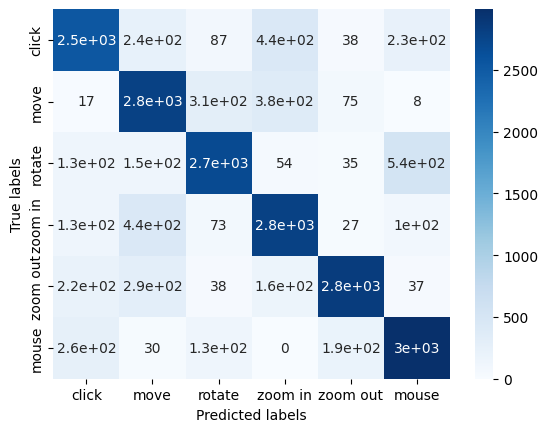

In [11]:
layers = tf.keras.Sequential([
    tf.keras.layers.Resizing(224,224, crop_to_aspect_ratio=True),
    tf.keras.layers.Rescaling(1./255)
])

test_dataset = get_dataset("D:/testing-aug", False, 32, "rgb")
test_dataset = test_dataset.map(lambda x,y: (layers(x), y))


model = vgg16_3()

model.load_weights(f"C:\\modelTraining\\imageBased\\vgg16-mais-nodes-img-aug\\8\\test.ckpt")
    
result = model.evaluate(test_dataset)
test_images = test_dataset.map(lambda x,y: x)
test_labels = test_dataset.map(lambda x,y: y)
predictions = model.predict(test_dataset)

true_labels = []
for _, labels in test_dataset:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())

true_labels = np.array(true_labels)
predicted_labels = np.argmax(predictions, axis=1)


cm = tf.math.confusion_matrix(true_labels, predicted_labels)

sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['click', 'move', 'rotate', 'zoom in', 'zoom out', 'mouse'], yticklabels= ['click', 'move', 'rotate', 'zoom in', 'zoom out', 'mouse'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

## Save do modelo

In [ ]:
model = vgg16_3()

model.load_weights(f"C:\\modelTraining\\imageBased\\vgg16-mais-nodes-img-aug\\0\\test.ckpt")
model.save("protobuf-models/vgg16-mais-nodes-img-aug-fold-0")

# ResNet50 Augmented with changes to architecture

In [ ]:
def resnet50():
    # Chamar o ResNet50 com o trainable a Falso
    resnet_model = tf.keras.applications.resnet.ResNet50(include_top=False, weights="imagenet")
    resnet_model.trainable=False

    # Mudar a camada de input
    inputs = tf.keras.Input(shape=(224,224,3))
    x = resnet_model(inputs, training=False)

    # Criar as duas camadas para previsão
    fc1 = tf.keras.layers.Dense(2048)(x)
    fc2 = tf.keras.layers.Dense(2048)(fc1)
    x = tf.keras.layers.Flatten()(fc2)
    output = tf.keras.layers.Dense(6, activation='softmax')(x)

    # Compilação do modelo
    model = tf.keras.Model(inputs, output)
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss = "categorical_crossentropy",
                  metrics = ["accuracy"])
    
    return model

def prepare_callbacks(directory):
    checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=directory,
                               monitor = 'val_accuracy',
                               verbose=1,
                               save_weights_only=True,
                               save_best_only=True)


    earlyStopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta = 0.0001, patience = 15, verbose = 1)

    reduceLR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.000000001, verbose = 1)

    return [checkpointer, earlyStopper, reduceLR]

## Loop de treino

In [ ]:
all_voluntairs = [3, 6, 4, 5, 7, 9, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24]
history_array_resnet_3 = []
result_array_resnet_3 = []
current_fold = 0
AUTOTUNE = tf.data.AUTOTUNE

layers = tf.keras.Sequential([
    tf.keras.layers.Resizing(224,224, crop_to_aspect_ratio=True),
    tf.keras.layers.Rescaling(1./255)
])

# Get the test dataset
test_dataset = get_dataset("/home/birdlab/Documents/bruno-repo/testing-aug", False, 32, "rgb")
test_dataset = test_dataset.map(lambda x,y: (layers(x), y))

for fold in val_folds:
    # Crio o dataset de validação
    create_dataset("validation-aug", fold)
    val_dataset = get_dataset("/home/birdlab/Documents/bruno-repo/validation-aug", False, batch_size=32, color_mode="rgb")
    
    # Determino os indices de treino
    train_index = [x for x in all_voluntairs if x not in fold]

    # Crio o dataset de treino
    create_dataset("training-aug", train_index)
    train_dataset = get_dataset("/home/birdlab/Documents/bruno-repo/training-aug", True, batch_size=32, color_mode="rgb")
    
    # Resize das imagens porque o vgg não aceita tão grandes
    train_dataset = train_dataset.map(lambda x,y: (layers(x),y))
    val_dataset = val_dataset.map(lambda x,y: (layers(x),y))

    # Aplica as funções de image augmentation
    processed_data = train_dataset
    processed_data = processed_data.concatenate(train_dataset.map(lambda x, y: (random_rotation(x), y)))
    processed_data = processed_data.concatenate(train_dataset.map(lambda x, y: (random_translation(x), y)))

    # Instancio um modelo novo
    model = resnet50()

    # Preparo os callback do novo modelo
    callbacks = prepare_callbacks(f"resnet-img-aug/{current_fold}/test.ckpt")

    # Treino o modelo e guardo a historia num array
    history = model.fit(processed_data, validation_data=val_dataset, epochs=20, callbacks=callbacks)
    history_array_resnet_3.append(history)

    result = model.evaluate(test_dataset)
    result_array_resnet_3.append(result)
    
    # Elimino as pastas criadas
    delete_folder("/home/birdlab/Documents/bruno-repo/validation-aug")
    delete_folder("/home/birdlab/Documents/bruno-repo/training-aug")

    current_fold += 1

## Resultado dos dados de teste para todos os modelos

In [ ]:
layers = tf.keras.Sequential([
    tf.keras.layers.Resizing(224,224, crop_to_aspect_ratio=True),
    tf.keras.layers.Rescaling(1./255)
])

test_dataset = get_dataset("D:/testing-aug", False, 32, "rgb")
test_dataset = test_dataset.map(lambda x,y: (layers(x), y))


model = resnet50()

model.load_weights(f"C:\\modelTraining\\imageBased\\resnet-img-aug\\5\\test.ckpt")

model.evaluate(test_dataset)
test_images = test_dataset.map(lambda x,y: x)
test_labels = test_dataset.map(lambda x,y: y)
predictions = model.predict(test_dataset)

true_labels = []
for _, labels in test_dataset:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())

true_labels = np.array(true_labels)
predicted_labels = np.argmax(predictions, axis=1)


cm = tf.math.confusion_matrix(true_labels, predicted_labels)

sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['click', 'move', 'rotate', 'zoom in', 'zoom out', 'mouse'], yticklabels= ['click', 'move', 'rotate', 'zoom in', 'zoom out', 'mouse'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

## Save dos modelos

In [ ]:
model = resnet50()

model.load_weights(f"C:\\modelTraining\\imageBased\\resnet-img-aug\\5\\test.ckpt")
model.save("C:/modelTraining/imageBased/protobuf-models/resnet50-img-aug-fold-5")